In [1]:
from numpy import inf, isinf
from scipy.integrate import quad
import matplotlib.pyplot as plt

In [2]:
freedom = 3  # степень свободы
p = [20, 60, 20]  # давление
v = [2, 2, 6]  # объем

In [3]:
assert freedom in (3, 5, 6)
assert isinstance(p, (tuple, list)) and isinstance(v, (tuple, list))
assert len(p) == len(v)

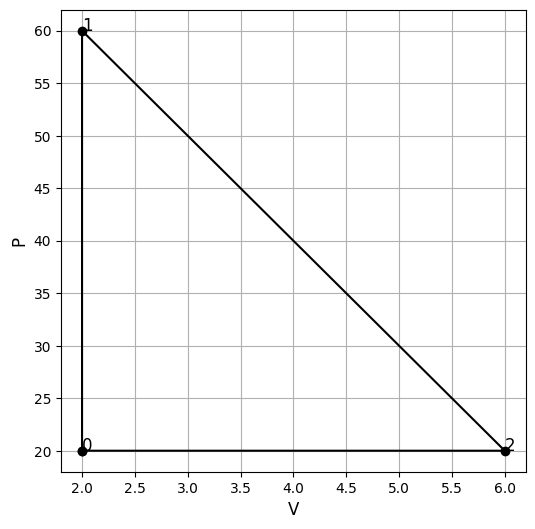

In [4]:
plt.figure(figsize=(6, 6))
plt.tight_layout()
plt.grid()
plt.xlabel('V', fontsize=12), plt.ylabel('P', fontsize=12)
plt.plot(v + [v[0]], p + [p[0]], color='black', marker='o')  # график
for i in range(len(p)):
    plt.text(v[i], p[i], f'{i}', fontsize=12)  # точки
plt.show()

In [5]:
A_cycle, Q_h = 0, 0  # работа цикла и теплота нагревания
for i in range(len(p)):
    
    k = (p[i]-p[i-1]) / (v[i]-v[i-1]) if (v[i]-v[i-1]) != 0 else inf
    b = p[i] - k * v[i]
    f = lambda x: k * x + b  # функция процесса

    dU = (freedom / 2) * (p[i] * v[i] - p[i-1] * v[i-1])  # изменение внутренней энергии
    A = quad(f, v[i-1], v[i])[0] if not isinf(k) else 0  # площадь под графиком
    Q = dU + A  # теплота
    
    print(f'{len(p)-1}-{i}' if i == 0 else f'{i-1}-{i}')
    print(f'{dU = }')
    print(f'{A = }')
    print(f'{Q = }')
    print()

    A_cycle += A
    if Q > 0: Q_h += Q

eff = A_cycle / Q_h
print(f'{eff = }')

2-0
dU = -120.0
A = -80.0
Q = -200.0

0-1
dU = 120.0
A = 0
Q = 120.0

1-2
dU = 0.0
A = 160.0
Q = 160.0

eff = 0.2857142857142857
